# Write a Data Science Blog Post

## 1) Pick a dataset

I have selected the No-show Appointment data sets to investigate into further.

Source: https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv&sa=D&ust=1532469042118000

## 2) Pose at least three questions related to business or real-world applications of how the data could be used.

Question 1: what's the distribution of appointments durring the week: weekday vs weekend?

Question 2: what's the distribution of no-show appointments durring the week: weekday vs weekend?

Question 3: does patients with scholarship tend to no-show more than patients with no scholarship?

Question 4: does female patients tend to no-show more than male patients?

Question 5: does patients diagnosed with Alcoholism, or Hipertension tend to no-show more than patients that are not?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


## 3) Create a Jupyter Notebook, using any associated packages you'd like, to:


### Prepare data:

#### Data Wrangling

In [3]:
#check the type of the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [4]:
#check if there are missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#check if there is any duplicated data
sum(df.duplicated())

0

In [6]:
#double check that the columns that shall hold 0/1 only don't hold another value
df['Scholarship'].value_counts()

0    99666
1    10861
Name: Scholarship, dtype: int64

In [7]:
df['Hipertension'].value_counts()

0    88726
1    21801
Name: Hipertension, dtype: int64

In [8]:
df['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [9]:
df['Alcoholism'].value_counts()

0    107167
1      3360
Name: Alcoholism, dtype: int64

In [10]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [11]:
df['SMS_received'].value_counts()

0    75045
1    35482
Name: SMS_received, dtype: int64

In [12]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

#### Data Cleaning (converting data types)

In [13]:
#change PatientId type to integer
df['PatientId'] = df['PatientId'].astype(int)

#change ScheduledDay and AppointmentDay type to datatime
#2016-04-29T18:38:08Z
df['ScheduledDay'] =  pd.to_datetime(df['ScheduledDay'], format='%Y-%m-%dT%H:%M:%SZ')
df['AppointmentDay'] =  pd.to_datetime(df['AppointmentDay'], format='%Y-%m-%dT%H:%M:%SZ')

#change Scholarship, Hipertension, Diabetes, Alcoholism and SMS_received type to boolean
df['Scholarship']=df['Scholarship'].astype(bool)
df['Hipertension']=df['Hipertension'].astype(bool)
df['Diabetes']=df['Diabetes'].astype(bool)
df['Alcoholism']=df['Alcoholism'].astype(bool)
df['SMS_received']=df['SMS_received'].astype(bool)

In [14]:
#check that the types were converted correctly
df.dtypes

PatientId                  int64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                 bool
Hipertension                bool
Diabetes                    bool
Alcoholism                  bool
Handcap                    int64
SMS_received                bool
No-show                   object
dtype: object

### Analyze, Model, and Visualize:
- Provide a clear connection between your business questions and how the data answers them.

#### Question 1: what's the distribution of appointments durring the week: weekday vs weekend?

In [15]:
#add a coloumn that holds the day of week that the appointment was scheduled
df['AppointmentWeekDay']=df['AppointmentDay'].dt.day_name()
df['AppointmentWeekDay'].value_counts()

Wednesday    25867
Tuesday      25640
Monday       22715
Friday       19019
Thursday     17247
Saturday        39
Name: AppointmentWeekDay, dtype: int64

In [16]:
def app_dist_week(data):
    """
    This function reads in a dataset and 
    return a list of total number of trips taken on each day of the week.
    sunday is not counted because it hold 0 values
    """
    counts=np.zeros(6)
    counts[0]=data.query('AppointmentWeekDay == "Monday"').AppointmentWeekDay.count()
    counts[1]=data.query('AppointmentWeekDay == "Tuesday"').AppointmentWeekDay.count()
    counts[2]=data.query('AppointmentWeekDay == "Wednesday"').AppointmentWeekDay.count()
    counts[3]=data.query('AppointmentWeekDay == "Thursday"').AppointmentWeekDay.count()
    counts[4]=data.query('AppointmentWeekDay == "Friday"').AppointmentWeekDay.count()
    counts[5]=data.query('AppointmentWeekDay == "Saturday"').AppointmentWeekDay.count()
    
    return counts

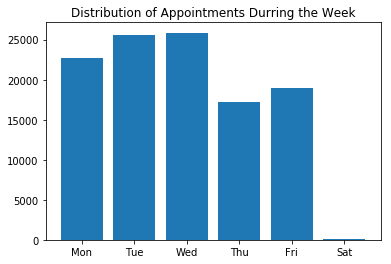

In [17]:
#what's the distribution of appointments durring the week: weekday vs weekend
counts=app_dist_week(df)

ind = np.arange(6)    # the x locations for the weekdays

p1 = plt.bar(ind, counts)

plt.title('Distribution of Appointments Durring the Week')
plt.xticks(ind, ('Mon','Tue','Wed','Thu','Fri','Sat'))

plt.show()

#### Question 2: what's the distribution of no-show appointments durring the week: weekday vs weekend?

In [18]:
#rename no-show column because of the errors
df.rename(columns={'No-show': 'noshow'}, inplace=True)

df['noshow'].value_counts()

No     88208
Yes    22319
Name: noshow, dtype: int64

In [19]:
#split the data based on no-show value
df_yes=df.query('noshow=="Yes"') #data of no-show appointments
df_no=df.query('noshow=="No"') #data of other appointments

In [20]:
#percentage of no-show appointments
df_no['AppointmentWeekDay'].value_counts()/df['AppointmentWeekDay'].value_counts()

Wednesday    0.803108
Tuesday      0.799064
Monday       0.793529
Friday       0.787739
Thursday     0.806459
Saturday     0.769231
Name: AppointmentWeekDay, dtype: float64

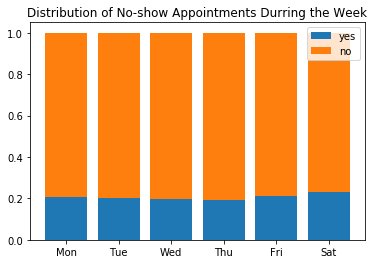

In [21]:
#visualize it
counts_y=app_dist_week(df_yes)/counts
counts_n=app_dist_week(df_no)/counts

ind = np.arange(6)    # the x locations for the weekdays

p1 = plt.bar(ind, counts_y)
p2 = plt.bar(ind, counts_n, bottom=counts_y)

plt.title('Distribution of No-show Appointments Durring the Week')
plt.xticks(ind, ('Mon','Tue','Wed','Thu','Fri','Sat'))
plt.legend((p1[0], p2[0]), ('yes', 'no'))

plt.show()

In [22]:
(df_no['AppointmentWeekDay'].value_counts()/df['AppointmentWeekDay'].value_counts()).mean()

0.7931881860163589

#### Question 3: does patients with scholarship tend to no-show more than patients with no scholarship?

In [23]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_yes['Scholarship'].value_counts()/df_yes['Scholarship'].value_counts().sum()

False    0.884493
True     0.115507
Name: Scholarship, dtype: float64

#### Question 4: does female patients tend to no-show more than male patients?

In [24]:
df_yes['Gender'].value_counts()/df_yes['Gender'].value_counts().sum()

F    0.653882
M    0.346118
Name: Gender, dtype: float64

#### Question 5: does patients diagnosed with Alcoholism, or Hipertension tend to no-show more than patients that are not?

In [25]:
sick=df.query('Alcoholism==True | Diabetes==True | Hipertension==True')
sick['noshow'].value_counts()/sick['noshow'].value_counts().sum()

No     0.822288
Yes    0.177712
Name: noshow, dtype: float64

### Findings and the results

#### Finding 1: Appointments are schduled at the begging of the week more than rest of the week. There is barely any appointments in the weekend.
#### Finding 2: no-show rate is almost the same on all the days: 79%
#### Finding 3: patients with no scholarship tend to not show to the appointment by 88%
#### Finding 4: female patients tend to not show to the appointment by 65%
#### Finding 5: patients who are not diagnosed with Alcoholism, or Hipertension tend to not show to the appointment by 82%